<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m3_%EB%B6%84%EC%84%9D%20%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/pandas/Pandas_3_%ED%83%90%EC%83%89_5030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contents
  - 결합 탐색
  - 조건 탐색
  - 변수 탐색
  - 인코딩
  - 시각적 탐색



In [ ]:
import numpy as np
import pandas as pd
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1, columns=list('abcde'))
df2 = pd.DataFrame(data2, columns=list('dehi'))
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [ ]:
con1=pd.concat([df1,df2],axis=0, ignore_index=True)            # 컬럼 관련해서 중복된 컬럼 'd', 'e'를 제외한 결손 data는 NaN으로...
con1

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
4,NaN,NaN,NaN,11,12,13.0,14.0
5,NaN,NaN,NaN,15,16,17.0,18.0
6,NaN,NaN,NaN,19,20,21.0,22.0
7,NaN,NaN,NaN,23,24,25.0,26.0
8,NaN,NaN,NaN,27,28,29.0,30.0


In [ ]:
con1=pd.concat([df1,df2],axis=1)            # 컬럼 관련해서 중복된 컬럼 'd', 'e'를 제외한 결손 data는 NaN으로...
con1

,a,b,c,d,e,d,e,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
df1['ind']=[1,2,3,4]
df1
df2['ind']=[1,2,3,4,5]
df2

,d,e,h,i,ind
0,11,12,13,14,1
1,15,16,17,18,2
2,19,20,21,22,3
3,23,24,25,26,4
4,27,28,29,30,5


* merge() 함수는 sql의 join 명령과 비슷한 방식으로 어떤 기준에 의해 두 데이터프레임을 병합한는 개념
* 기준이 되는 열이나 인덱스를 키라고 부름
* 키가 되는 열이나 인덱스는 반드시 양쪽 데이터프레임에 모두 존재함

In [ ]:
pd.merge(df1,df2, on='ind')       # default는 inner

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1,2,3,4,5,1,11,12,13,14
1,6,7,8,9,10,2,15,16,17,18
2,11,12,13,14,15,3,19,20,21,22
3,16,17,18,19,20,4,23,24,25,26


In [ ]:
pd.merge(df1,df2, on='ind', how='outer')       # default는 inner

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1.0,2.0,3.0,4.0,5.0,1,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,2,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,3,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,4,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,5,27,28,29,30


In [ ]:
df1=df1.drop('ind', axis=1)
df2=df2.drop('ind', axis=1)

print(df1,"\n\n", df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

     d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


* 판다스 join() 메소드는 merge() 함수를 기반으로 만들어졌기 때문에 기본 작동 방식이 서로 비슷
* join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합하는 점에서 merge와 차이가 있으나 on=keys 옵션 설정하면 열을 기준으로 결합

In [ ]:
## join은 인덱스 기준으로 결합(default는 교집합)
df1.join(df2,lsuffix="_1", rsuffix='_2', how='outer')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
import pandas as pd

filepath1='/content/drive/MyDrive/00_KITA_2404/M3_분석라이브러리/pandas/dataset/stock price.xlsx'
filepath2='/content/drive/MyDrive/00_KITA_2404/M3_분석라이브러리/pandas/dataset/stock valuation.xlsx'

df1=pd.read_excel(filepath1, engine='openpyxl', index_col='id')
df2=pd.read_excel(filepath2, engine='openpyxl', index_col='id')
print(df1,"\n\n", df2)

       stock_name          value   price
id                                      
128940       한미약품   59385.666667  421000
130960     CJ E&M   58540.666667   98900
138250      엔에스쇼핑   14558.666667   13200
139480        이마트  239230.833333  254500
142280     녹십자엠에스     468.833333   10200
145990        삼양사   82750.000000   82000
185750        종근당   40293.666667  100500
192400      쿠쿠홀딩스  179204.666667  177500
199800         툴젠   -2514.333333  115400
204210     모두투어리츠    3093.333333    3475 

              name           eps     bps        per       pbr
id                                                          
130960     CJ E&M   6301.333333   54068  15.695091  1.829178
136480         하림    274.166667    3551  11.489362  0.887074
138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
139480        이마트  18268.166667  295780  13.931338  0.860437
145990        삼양사   5741.000000  108090  14.283226  0.758627
161390      한국타이어   5648.500000   51341   7.453306  0.820007
181710  NHN엔터테인먼트

In [ ]:
## Data Frame 결합
df3=df1.join(df2)
df3

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068.0,15.695091,1.829178
138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN
139480,이마트,239230.833333,254500,이마트,18268.166667,295780.0,13.931338,0.860437
142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090.0,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684.0,25.185866,2.470259
192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN
199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3=df1.join(df2, how='left')
df3

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068.0,15.695091,1.829178
138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN
139480,이마트,239230.833333,254500,이마트,18268.166667,295780.0,13.931338,0.860437
142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090.0,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684.0,25.185866,2.470259
192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN
199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3=df1.join(df2, how='inner')        ## 공통적인것만 Join의 결과로..취합
df3

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [ ]:
df3=df1.join(df2, how='right')
df3

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068,15.695091,1.829178
136480,NaN,NaN,NaN,하림,274.166667,3551,11.489362,0.887074
138040,NaN,NaN,NaN,메리츠금융지주,2122.333333,14894,6.313806,0.899691
139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090,14.283226,0.758627
161390,NaN,NaN,NaN,한국타이어,5648.500000,51341,7.453306,0.820007
181710,NaN,NaN,NaN,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335,40.802348,0.651359


In [ ]:
df4=df1.join(df2, how='inner')        ## 공통적인것만 Join의 결과로..취합
df4

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [ ]:
# Q. df4 에서 중복된 컬럼을 삭제한 후 불린 인덱싱을 이용하여 eps가 3000보다 적거나 stock_name이 이마트인
# 데이터를 선택하여 데이터 프레임을 생성하고 df5이름으로 저장 출력
df4.drop(['name'], axis=1,inplace=True)
df5=df4[(df4['eps']< 3000) | (df4['stock_name']=='이마트')]

df5

,stock_name,value,price,eps,bps,per,pbr
id,,,,,,,
139480,이마트,239230.833333,254500,18268.166667,295780,13.931338,0.860437
204210,모두투어리츠,3093.333333,3475,85.166667,5335,40.802348,0.651359


In [ ]:
import numpy as np
import pandas as pd
data = np.arange(20).reshape(4,5)
df=pd.DataFrame(data,columns=list('abced'))
df

,a,b,c,e,d
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
df1=df.copy()
print(df1)
df1.drop(df1.index[0],inplace=True)
df1

    a   b   c   e   d
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19


,a,b,c,e,d
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
idx=df1[df1.a>10].index
print(idx,'\n')
df1.drop(idx)

Index([3], dtype='int64') 



,a,b,c,e,d
1,5,6,7,8,9
2,10,11,12,13,14


In [ ]:
import numpy as np
import pandas as pd
data = np.arange(20).reshape(4,5)
df=pd.DataFrame(data,columns=['a','b','c','e','d'])
df

,a,b,c,e,d
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
cond1=df.a > 10
cond2=df.b == 16
cond3=df.e > 15
df2=df[cond1 & cond2 & cond3]
print(df2)

    a   b   c   e   d
3  15  16  17  18  19


In [ ]:
cond1=df.a > 10
cond2=df.b ==16
cond3=df.e > 15
df10=df[cond1 | cond2 | cond3]
df10

,a,b,c,e,d
3,15,16,17,18,19


In [ ]:
df[cond1]

,a,b,c,e,d
3,15,16,17,18,19


In [ ]:
df[cond1][['a','b']]

,a,b
3,15,16


In [ ]:
import seaborn as sns
df=sns.load_dataset('titanic')
tdf=df.copy()
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
tdf.rename(columns={'sex':'gender', 'fare':'ticket'}, inplace=True)
tdf

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# value 변경
df1=tdf[['gender']].replace(['female', 'male'], [1,0])
df1.gender.value_counts()

gender
0    577
1    314
Name: count, dtype: int64

In [ ]:
tdf.rename(str.upper, axis=1, inplace=True)
tdf

,SURVIVED,PCLASS,GENDER,AGE,SIBSP,PARCH,TICKET,EMBARKED,CLASS,WHO,ADULT_MALE,DECK,EMBARK_TOWN,ALIVE,ALONE
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df2=df.copy()

In [ ]:
df2.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
columns_customed=['pclass','sex','age','survived']
df2[columns_customed].head()

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [ ]:
tdf1=tdf[['age','fare']].head()
tdf1

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     5 non-null      float64
 1   fare    5 non-null      float64
dtypes: float64(2)
memory usage: 208.0 bytes


In [ ]:
tdf1=tdf1.astype({'age':"int", 'fare':'int'})
tdf1

,age,fare
0,22,7
1,38,71
2,26,7
3,35,53
4,35,8


In [ ]:
tdf.age.value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [ ]:
tdf.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
# 범주화: "Baby" "Child" "Teenager, "Young Adult", "Adult", "Elderly"

#tdf['Age_Cate']=df['Score'].map(lambda x: "A" if x >= 90 else ("B" if x >= 80 else ('C' if x >= 70 else 'D')))


def GroupAge(x):
  if x <= 3: Cate='Baby'
  elif x < 10: Cate='Child'
  elif x < 19: Cate='Teenager'
  elif x < 30: Cate='Young Adult'
  elif x < 50: Cate='Adult'
  elif x >= 50: Cate='Elderly'
  else: Cate=np.nan
  return Cate

tdf['Age_Cate']=tdf['age'].map(lambda x: GroupAge(x))
tdf['Age_Cate2']=tdf['age'].apply(GroupAge)
tdf['Age_Cate3']=tdf['age'].map(lambda x: "Baby" if x <= 10 else ("Child" if x <= 10 else ('Teenager' if x <= 19 else ('Young Adult' if x <= 30 else ('Adult' if x <= 50 else 'Elderly')))))
labels = ['Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly']
tdf['Age_Cate4']= pd.cut(tdf['age'], bins = [0, 3, 10, 19, 30, 50, float('inf')], labels=labels)
tdf

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Cate,Age_Cate2,Age_Cate3,Age_Cate4
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult,Young Adult,Young Adult,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,Adult,Adult,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Young Adult,Young Adult,Young Adult,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,Adult,Adult,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,Adult,Adult,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Young Adult,Young Adult,Young Adult,Young Adult
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,Young Adult,Young Adult,Teenager,Teenager
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,NaN,Elderly,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,Young Adult,Young Adult,Young Adult,Young Adult


In [ ]:
import pandas as pd

# 데이터프레임 읽기
file_path = '/content/drive/MyDrive/00_KITA_2404/M3_분석라이브러리/pandas/dataset/titanic3.csv'
df = pd.read_csv(file_path)

# 생존자와 비생존자 수 계산
survival_counts = df['survived'].value_counts()

# 결과 출력
print(survival_counts)

survived
0    809
1    500
Name: count, dtype: int64


In [ ]:
from google.colab import files

# file 업로드
uploaded = files.upload()

Saving titanic3.csv to titanic3.csv


범주형 데이터를 수치형 데이터로 변환
- Label Encoding은 각 범주형 값을 고유한 정수로 변환. 이 방법은 범주형 변수에 순서나 순위가 있을 때 유용
- One-Hot Encoding은 각 범주형 값을 이진 벡터로 변환. 이 방법은 범주형 변수에 순서나 순위가 없을 때 유용

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
features=['gender','age']
for feature in features:
  tdf[feature]=le.fit_transform(tdf[feature])
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Cate,Age_Cate2,Age_Cate3,Age_Cate4
0,0,3,1,28,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult,Young Adult,Young Adult,Teenager
1,1,1,0,51,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,Adult,Adult,Adult
2,1,3,0,34,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Young Adult,Young Adult,Young Adult,Young Adult
3,1,1,0,47,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,Adult,Adult,Young Adult
4,0,3,1,47,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,Adult,Adult,Young Adult


In [ ]:
from sklearn.preprocessing import OneHotEncoder
### 문자 형태에서는 지양,
import pandas as pd

tdf2=tdf[['gender', 'class']]

oh = OneHotEncoder(sparse=False)

features=['gender','class']

for feature in features:
  feature_data = tdf2[feature].values.reshape(-1, 1)
  feature_encoded = pd.DataFrame(oh.fit_transform(feature_data), columns=oh.categories_[0])
  tdf2 = pd.concat([tdf2, feature_encoded], axis=1)
tdf2

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender,class,female,male,First,Second,Third
0,male,Third,0.0,1.0,0.0,0.0,1.0
1,female,First,1.0,0.0,1.0,0.0,0.0
2,female,Third,1.0,0.0,0.0,0.0,1.0
3,female,First,1.0,0.0,1.0,0.0,0.0
4,male,Third,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
886,male,Second,0.0,1.0,0.0,1.0,0.0
887,female,First,1.0,0.0,1.0,0.0,0.0
888,female,Third,1.0,0.0,0.0,0.0,1.0
889,male,First,0.0,1.0,1.0,0.0,0.0


In [ ]:
### 문자 형태에서는 지양,
import pandas as pd

tdf2=tdf[['gender', 'class']]
tdf2.head()
pd.get_dummies(tdf2).head()

,gender_female,gender_male,class_First,class_Second,class_Third
0,False,True,False,False,True
1,True,False,True,False,False
2,True,False,False,False,True
3,True,False,True,False,False
4,False,True,False,False,True


Pandas는 주로 Matplotlib 라이브러리를 기반으로 하여 시각화를 구현하며, 간단한 코드로 다양한 그래프를 생성

[ 주요 시각화 함수 ]

plot(): 기본적인 시각화 함수를 제공하며, 다양한 종류의 그래프를 그릴 수 있다.

kind 매개변수를 통해 그래프의 종류를 지정할 수 있다. (line, bar, barh, hist, box, kde, density, area, pie, scatter, hexbin 등)

- hist(): 히스토그램을 생성.
- boxplot(): 박스 플롯을 생성.
- scatter_matrix(): 여러 변수 간의 산점도 행렬을 생성.
- plot.scatter(): 산점도를 생성.
- plot.bar(): 막대 그래프를 생성.
- plot.kde(): 커널 밀도 추정 그래프를 생성.

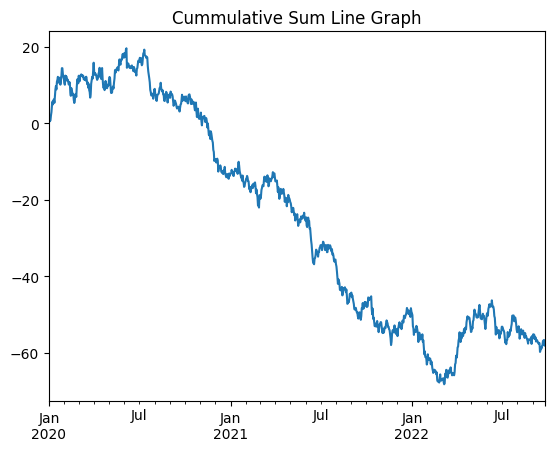

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
ts=pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000))
ts = ts.cumsum()

# 라인그래프
ts.plot()
plt.title("Cummulative Sum Line Graph")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
ts=pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000))
ts1 = ts.cumsum()


df=pd.DataFrame({'value': ts, 'cum': ts1})
df.head()

,value,cum
2020-01-01,0.721733,0.721733
2020-01-02,-0.690868,0.030865
2020-01-03,1.649100,1.679965
2020-01-04,-0.642203,1.037762
2020-01-05,-0.132710,0.905052


              A         B
one    0.905151  0.025988
two    0.998617  0.625100
three  0.598045  0.031811
four   0.857908  0.521236
five   0.840761  0.016896 



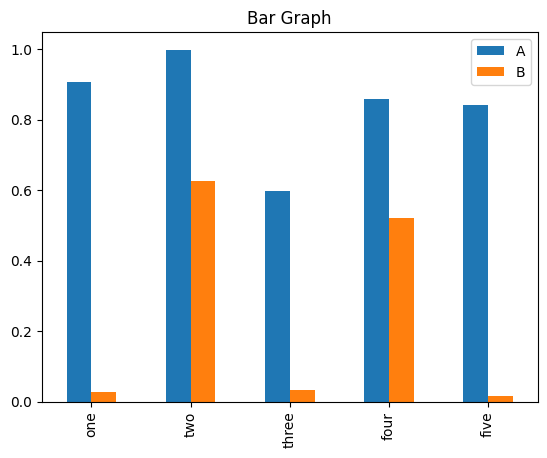

In [ ]:
df=pd.DataFrame({
    'A': np.random.rand(5),
    'B': np.random.rand(5)
},
index=['one', 'two', 'three', 'four', 'five'])

print(df,'\n')
# 막대 그래프
df.plot.bar()
plt.title('Bar Graph')
plt.show()



            A         B
0   -0.585340 -0.194891
1   -0.475702  1.780751
2   -0.362006 -0.601483
3    0.650840 -1.642605
4    2.300595 -0.565049
..        ...       ...
995  0.367699  1.178403
996 -0.126342  0.781988
997  1.023532  1.104871
998  0.224721 -0.884960
999 -0.157769  0.136318

[1000 rows x 2 columns] 



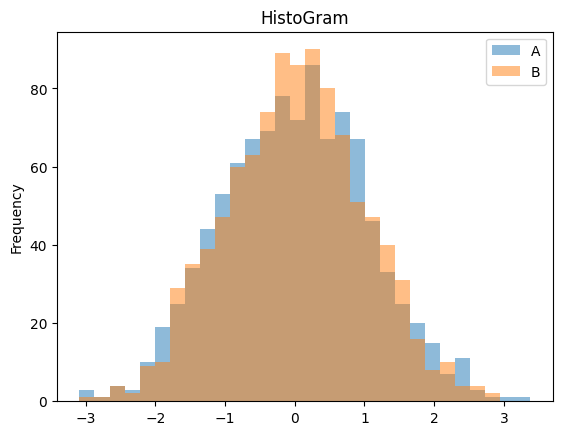

In [ ]:
df=pd.DataFrame({
    'A': np.random.randn(1000),
    'B': np.random.randn(1000)
})

print(df,'\n')
# 히스토그램
df.plot.hist(alpha=0.5,bins=30)
plt.title('HistoGram')
plt.show()

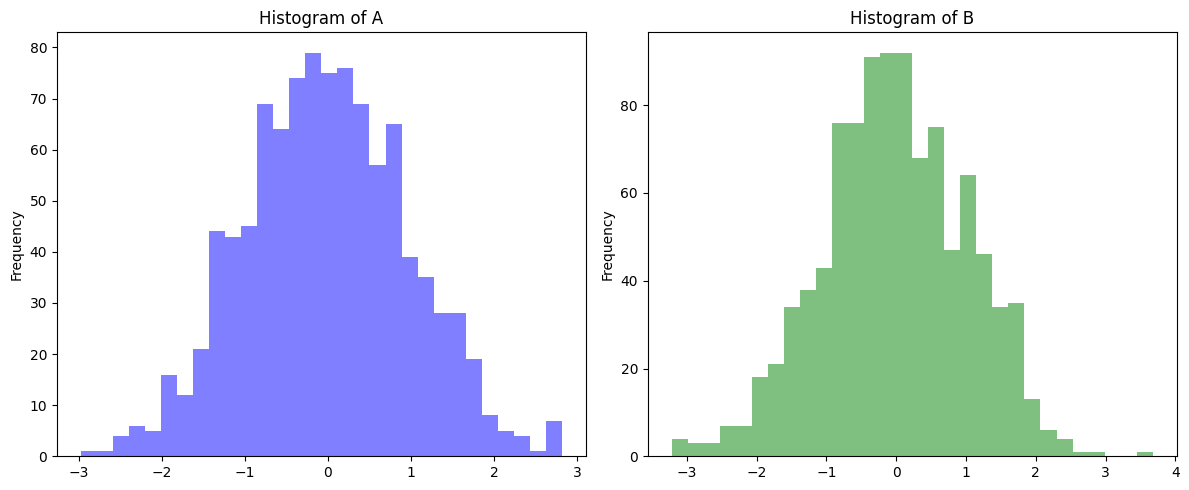

In [ ]:
df=pd.DataFrame({
    'A': np.random.randn(1000),
    'B': np.random.randn(1000)
})

# 그래프의 크기 설정
plt.figure(figsize=(12, 5))

# 첫 번째 히스토그램 (A)
plt.subplot(1, 2, 1)
df['A'].plot.hist(alpha=0.5, bins=30, color='blue')
plt.title('Histogram of A')

# 두 번째 히스토그램 (B)
plt.subplot(1, 2, 2)
df['B'].plot.hist(alpha=0.5, bins=30, color='green')
plt.title('Histogram of B')

# 레이아웃을 조정합니다.
plt.tight_layout()
plt.show()